In [1]:
#EEE2004 - MEASUREMENT AND INSTRUMENTATION
#EARLY DETECTION OF LUNG CANCER - SHREEYA SANTHANAM AND ANASWARA SANTHOSH GUIDED BY DR P ARULMOZHIVARMAN 
#MODEL 1 - BY SHREEYA SANTHANAM
#THIS PROJECT HELPS IN EARLY DETECTION OF LUNG CANCER 
#IT HELPS IN DETECTING WHETHER THE PATIENT HAS CANCER OR NOT


#IMPORTING THE NECESSARY LIBRARIES
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf


In [39]:
#Pre-processing the data
#DATA AUGMENTATION
from tensorflow.keras.preprocessing.image import ImageDataGenerator
image_gen = ImageDataGenerator(rescale = 1./255,
                               shear_range = 0.2,
                               zoom_range = 0.2,
                                horizontal_flip = True)
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
input_classes=['Normal','Cancer']#Labelling the data 
label_encoder.fit(input_classes)
for i,item in enumerate(label_encoder.classes_):print(item,'-->',i)
input_classes=['Normal','Cancer']


Cancer --> 0
Normal --> 1


In [52]:
#THE DATA HAS BEEN SPLIT INTO TRAIN , TEST AND VALIDATION DIRECTORIES FOR BETTER TRAINING OF THE MODEL
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
img_height=500 #dimensions of the image 
img_width=500
batch_size=16#number of images utilized in 1 epoch
train_path='Documents/Dataset/Final_Data/Train'
test_path='Documents/Dataset/Final_Data/Test'
valid_path='Documents/Dataset/Final_Data/Valid'

from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Create Image Data Generator for Train Set
train_img_gen = ImageDataGenerator(
                                  rescale = 1./255,#rescaling all the images to equal pixel size to avoid ambiguity [0,255]->[0,1]
                                  shear_range = 0.2,#to slant the image
                                  zoom_range = 0.2,#zoom the image
                                  horizontal_flip = True,          
                               )
# Create Image Data Generator for Test/Validation Set
test_data_gen = ImageDataGenerator(rescale = 1./255)
train = train_img_gen.flow_from_directory( #to directly read the images from the given directory
      train_path,
      target_size=(img_height, img_width),
      color_mode='grayscale',
      class_mode='binary',#for giving the index to classes used - binary since 1 - normal 0 - cancer
      batch_size=16,
      )
test = test_data_gen.flow_from_directory(
      test_path,
      target_size=(img_height, img_width),
      color_mode='grayscale',
      shuffle=False, 
#setting shuffle as False just so we can later compare it with predicted values without having indexing problem 
      class_mode='binary',
      batch_size=16,
      )
valid = test_data_gen.flow_from_directory(
      valid_path,
      target_size=(img_height, img_width),
      color_mode='grayscale',
      class_mode='binary', 
      batch_size=16,
      )


Found 2572 images belonging to 2 classes.
Found 18 images belonging to 2 classes.
Found 204 images belonging to 2 classes.


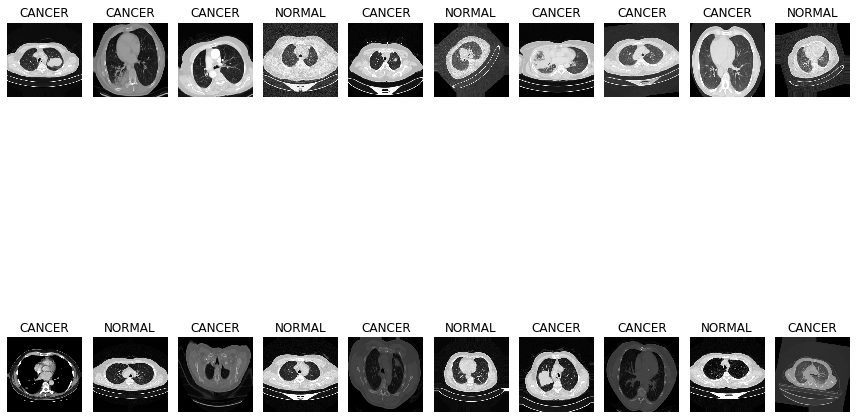

In [44]:
plt.figure(figsize=(12, 12))
for i in range(0, 20):
    plt.subplot(2, 10, i+1)
    for X_batch, Y_batch in train:
        image = X_batch[0]        
        dic = {0:'CANCER', 1:'NORMAL'}#LABELING THE DATA AND DISPLAY OF SOME IMAGE DATASETS FOR BETTER UNDERSTANDING
        plt.title(dic.get(Y_batch[0]))
        plt.axis('off')
        plt.imshow(np.squeeze(image),cmap='gray',interpolation='nearest')
        break
plt.tight_layout()
plt.show()

In [4]:
#WE START TRAINING THE MODEL FROM HERE
#FIRST WE IMPORT TENSORFLOW AND KERAS WHICH ARE VERY IMPORTANT FOR THE MACHINE LEARNING AND TRAINING OF THE MODEL

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image
#HERE WE ARE GOING TO USE THE CONVOLUTIONAL NEURAL NETWORK IN ORDER TO TRAIN OUR DATASET IN A BETTER WAY
#kernel size =3*3 ie we have applied a filter of matrix 3*3 on the input image and have extracted the features
#NUMBER OF FILTERS USED INITIALLY IS 32 FOR PROPER FEATURE EXTRACTION
#ACTIVATION = RECTIFIED LINEAR UNTI
#POOLING SIZE 2*2
#OPTIMIZER USED IS ADAM 
model = Sequential()
model.add(Conv2D(32, (3, 3), activation="relu", input_shape=(img_width, img_height, 1)))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(64, (3, 3), activation="relu", input_shape=(img_width, img_height, 1)))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(128, (3, 3), activation="relu", input_shape=(img_width, img_height, 1)))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(activation = 'relu', units = 128))
model.add(Dense(activation = 'relu', units = 64))
model.add(Dense(activation = 'sigmoid', units = 1))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 498, 498, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 249, 249, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 247, 247, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 123, 123, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 121, 121, 128)     73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 60, 60, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 460800)            0

In [7]:


#EARLY STOPPING IS USED TO STOP THE TRAINING OF THE MODEL WHEN NO IMPROVEMENTS OR SIGNIFICANT CHANGES ARE OBSERVED
#WE THEN DECREASE THE LEARNING RATE FOR BETTER EVALUATION
early = EarlyStopping(monitor='val_loss', mode='min', patience=3)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', patience = 2, verbose=1,factor=0.3, min_lr=0.000001)
callbacks_list = [ early, learning_rate_reduction]

In [8]:
#ASSIGNING THE CLASS WEIGHTS TO THE DATASETS
from sklearn.utils.class_weight import compute_class_weight
weights = compute_class_weight('balanced', np.unique(train.classes), train.classes)
cw = dict(zip( np.unique(train.classes), weights))
print(cw)#finding input weight size 

{0: 0.7992541951522685, 1: 1.335410176531672}


E:\Anaconda\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass classes=[0 1], y=[0 0 0 ... 1 1 1] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [9]:
history=model.fit(train,epochs=25, validation_data=valid, class_weight=cw, callbacks=callbacks_list)
# trainig data, number of epochs , validating the training data with validation data , assigning the weights , early stopping


Epoch 1/25
161/161 [==============================] - 672s 4s/step - loss: 1.0133 - accuracy: 0.6224 - val_loss: 0.4882 - val_accuracy: 0.7745
Epoch 2/25
161/161 [==============================] - 693s 4s/step - loss: 0.3840 - accuracy: 0.8216 - val_loss: 0.7009 - val_accuracy: 0.5196
Epoch 3/25
161/161 [==============================] - 684s 4s/step - loss: 0.3217 - accuracy: 0.8530 - val_loss: 0.5000 - val_accuracy: 0.8235

Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
Epoch 4/25
161/161 [==============================] - 577s 4s/step - loss: 0.2888 - accuracy: 0.8705 - val_loss: 0.4736 - val_accuracy: 0.7990
Epoch 5/25
161/161 [==============================] - 528s 3s/step - loss: 0.2342 - accuracy: 0.8975 - val_loss: 0.5760 - val_accuracy: 0.6814
Epoch 6/25
161/161 [==============================] - 501s 3s/step - loss: 0.2201 - accuracy: 0.9134 - val_loss: 0.4049 - val_accuracy: 0.8284
Epoch 7/25
161/161 [==============================] - 530s 3s

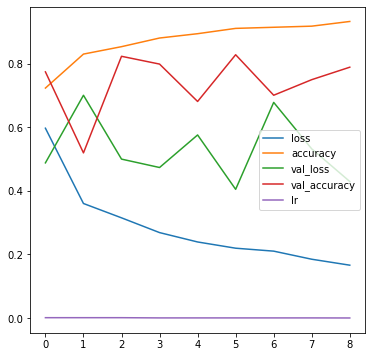

In [23]:
#EVALUATION OF THE MODEL BY PLOTTING THE NECESSARY PARAMETERS
df = pd.DataFrame(history.history)
df.plot(figsize=(6,6))
plt.legend() 

In [11]:

len(model.layers)

10

In [53]:
#EVALUATION OF LOSSES AND ACCURACY OF THE MODEL 

loss, accuracy = model.evaluate(test)
print("\n\nLoss: ", loss)
print("Accuracy: {:.2f}".format(accuracy*100),"\n")

2/2 [==============================] - 1s 198ms/step - loss: 0.6746 - accuracy: 0.8889


Loss:  0.6745612621307373
Accuracy: 88.89 



In [45]:
preds = model.predict(test,verbose=1)

2/2 [==============================] - 2s 181ms/step


In [46]:
#REQUIRED PARAMETERS FOR THE CONFUSION MATRIX
predictions = preds.copy()
predictions[predictions <= 0.5] = 0 #it is a normal case
predictions[predictions > 0.5] = 1 #it is a positive case

<AxesSubplot:>

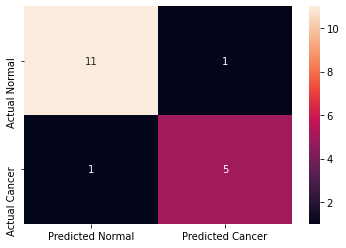

In [47]:

from sklearn.metrics import classification_report,confusion_matrix
cm = pd.DataFrame(data=confusion_matrix(test.classes, predictions, labels=[0, 1]),index=["Actual Normal", "Actual Cancer"],
columns=["Predicted Normal", "Predicted Cancer"])
import seaborn as sns
sns.heatmap(cm,annot=True,fmt="d")

In [54]:
print(classification_report(y_true=test.classes,y_pred=predictions,target_names =['NORMAL','CANCER']))

              precision    recall  f1-score   support

      NORMAL       0.92      0.92      0.92        12
      CANCER       0.83      0.83      0.83         6

    accuracy                           0.89        18
   macro avg       0.88      0.88      0.88        18
weighted avg       0.89      0.89      0.89        18



In [55]:
test_accu = model.evaluate(test)
print('The testing accuracy is :',test_accu[1]*100, '%')

2/2 [==============================] - 2s 199ms/step - loss: 0.6746 - accuracy: 0.8889
The testing accuracy is : 88.88888955116272 %


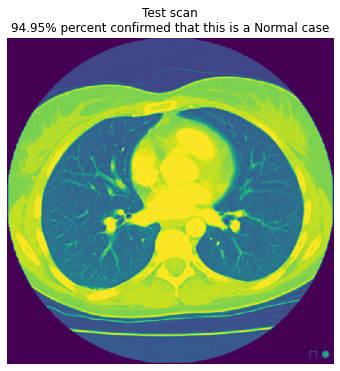

In [56]:
# Testing 
img_path = 'Documents/Dataset//NORMAL_CASE.jpg'
from tensorflow.keras.preprocessing import image
test_img = image.load_img(img_path, target_size=(500, 500),color_mode='grayscale')
# Preprocessing the image
pp_test_img = image.img_to_array(test_img)
pp_test_img = pp_test_img/255
pp_test_img = np.expand_dims(pp_test_img, axis=0)
#predict
test_preds= model.predict(pp_test_img)
#print
plt.figure(figsize=(6,6))
plt.axis('off')
if test_preds>= 0.5: 
    out = ('{:.2%} percent confirmed that this is a Cancer case'.format(test_preds[0][0]))
    
else: 
    out = ('{:.2%} percent confirmed that this is a Normal case'.format(1-test_preds[0][0]))
plt.title("Test scan\n"+out)  
plt.imshow(np.squeeze(pp_test_img))
plt.show()

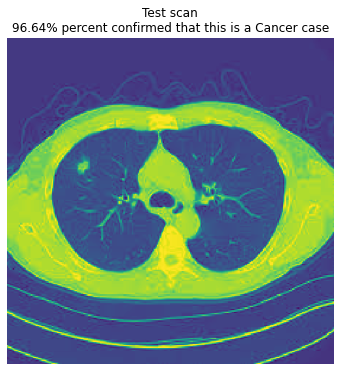

In [57]:
# Testing cancer
img_path = 'Documents/Dataset/cancer1.jpg'
from tensorflow.keras.preprocessing import image
test_img = image.load_img(img_path, target_size=(500, 500),color_mode='grayscale')
# Preprocessing the image
pp_test_img = image.img_to_array(test_img)
pp_test_img = pp_test_img/255
pp_test_img = np.expand_dims(pp_test_img, axis=0)
#predict
test_preds= model.predict(pp_test_img)
#print
plt.figure(figsize=(6,6))
plt.axis('off')
if test_preds>= 0.5: 
    out = ('{:.2%} percent confirmed that this is a Cancer case'.format(test_preds[0][0]))
    
else: 
    out = ('{:.2%} percent confirmed that this is a Normal case'.format(1-test_preds[0][0]))
plt.title("Test scan\n"+out)  
plt.imshow(np.squeeze(pp_test_img))
plt.show()

In [ ]:
#REFERENCES : https://www.tensorflow.org/tutorials/images/cnn
#https://www.youtube.com/watch?v=CNP2IAldEk8&t=0s
#https://www.youtube.com/watch?v=Y1qxI-Df4Lk
#https://stackoverflow.com/questions/61060736/how-to-interpret-model-summary-output-in-cnn
#https://machinelearningmastery.com/rectified-linear-activation-function-for-deep-learning-neural-networks/
#https://towardsdatascience.com/adam-latest-trends-in-deep-learning-optimization-6be9a291375c
#https://medium.com/@RaghavPrabhu/understanding-of-convolutional-neural-network-cnn-deep-learning-99760835f148#:~:text=Strides,with%20a%20stride%20of%202
#https://www.javatpoint.com/training-of-cnn-in-tensorflow
#https://www.datacamp.com/community/tutorials/convolutional-neural-networks-python
#https://www.youtube.com/watch?v=daovGOlMbT4
#https://pythonprogramming.net/convolutional-neural-network-cnn-machine-learning-tutorial/
#https://stackoverflow.com/questions/24509921/how-do-you-decide-the-parameters-of-a-convolutional-neural-network-for-image-cla
#https://datascience.stackexchange.com/questions/55545/in-cnn-why-do-we-increase-the-number-of-filters-in-deeper-convolution-layers-fo

#DATASETS USED : https://www.kaggle.com/hamdallak/the-iqothnccd-lung-cancer-dataset
#https://data.mendeley.com/datasets/p2r42nm2ty/2

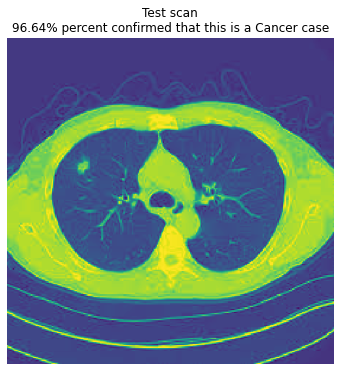

In [58]:
# Testing cancer
img_path = 'Documents/Dataset/cancer1.jpg'
from tensorflow.keras.preprocessing import image
test_img = image.load_img(img_path, target_size=(500, 500),color_mode='grayscale')
# Preprocessing the image
pp_test_img = image.img_to_array(test_img)
pp_test_img = pp_test_img/255
pp_test_img = np.expand_dims(pp_test_img, axis=0)
#predict
test_preds= model.predict(pp_test_img)
#print
plt.figure(figsize=(6,6))
plt.axis('off')
if test_preds>= 0.5: 
    out = ('{:.2%} percent confirmed that this is a Cancer case'.format(test_preds[0][0]))
    
else: 
    out = ('{:.2%} percent confirmed that this is a Normal case'.format(1-test_preds[0][0]))
plt.title("Test scan\n"+out)  
plt.imshow(np.squeeze(pp_test_img))
plt.show()